In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
train = pd.read_csv(r"C:\Users\Vetin\train.csv")
test = pd.read_csv(r"C:\Users\Vetin\test.csv")

In [3]:
complete_data=[train,test]

In [4]:
for i in complete_data:
    print(i.head())
    print(i.info())
    print()
    print("#"*90)
    print()

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
#I changed the type of colmns, because both seem to be categorical features, not numerical.

for i in complete_data:
    i["MoSold"]=i["MoSold"].astype('object')
    i["MSSubClass"]=i["MSSubClass"].astype('object')

In [6]:
# Lines print the number of duplicated entries. Entries are zero.

for i in complete_data:
    print(len(i[i.duplicated()]))

0
0


In [7]:
#Splitting all features in categorical and numeric features:

num_feats = list(test.select_dtypes(exclude='object').columns)
cat_feats = list(test.select_dtypes(include='object').columns)

#I took the test data, since it contains the same columns as the training data except of the target.

In [8]:
#Printing out the null-values of the numeric features:

for i in num_feats:
    if train[i].isnull().sum() > 0:
        print("train: " + i + ": " +str(train[i].isnull().sum()))
    if test[i].isnull().sum() >0:
        print("test: " + i + ": " +str(test[i].isnull().sum()))

train: LotFrontage: 259
test: LotFrontage: 227
train: MasVnrArea: 8
test: MasVnrArea: 15
test: BsmtFinSF1: 1
test: BsmtFinSF2: 1
test: BsmtUnfSF: 1
test: TotalBsmtSF: 1
test: BsmtFullBath: 2
test: BsmtHalfBath: 2
train: GarageYrBlt: 81
test: GarageYrBlt: 78
test: GarageCars: 1
test: GarageArea: 1


In [9]:
#Filling in the null-values of the numeric features:

for i in complete_data:
    i["LotFrontage"].fillna(0,inplace=True)
    i["MasVnrArea"].fillna(0,inplace=True)
    i["BsmtFinSF1"].fillna(0,inplace=True)
    i["BsmtFinSF2"]=i["BsmtFinSF2"].fillna(0)
    i["BsmtUnfSF"]=i["BsmtUnfSF"].fillna(0)
    i["TotalBsmtSF"]=i["TotalBsmtSF"].fillna(0)
    i["BsmtFullBath"]=i["BsmtFullBath"].fillna(0)
    i["BsmtHalfBath"]=i["BsmtHalfBath"].fillna(0)
    i["GarageYrBlt"]=i["GarageYrBlt"].fillna(0) # not sure whats doing less damage: "0" or "mode()[0]"
    i["GarageCars"]=i["GarageCars"].fillna(0)
    i["GarageArea"]=i["GarageArea"].fillna(0)

In [10]:
#Printing out the null-values of the categorical features:

for i in cat_feats:
    if train[i].isnull().sum() > 0:
        print("train " + i + ": " +str(train[i].isnull().sum()))
    if test[i].isnull().sum() >0:
        print("test " + i + ": " +str(test[i].isnull().sum()))

test MSZoning: 4
train Alley: 1369
test Alley: 1352
test Utilities: 2
test Exterior1st: 1
test Exterior2nd: 1
train MasVnrType: 8
test MasVnrType: 16
train BsmtQual: 37
test BsmtQual: 44
train BsmtCond: 37
test BsmtCond: 45
train BsmtExposure: 38
test BsmtExposure: 44
train BsmtFinType1: 37
test BsmtFinType1: 42
train BsmtFinType2: 38
test BsmtFinType2: 42
train Electrical: 1
test KitchenQual: 1
test Functional: 2
train FireplaceQu: 690
test FireplaceQu: 730
train GarageType: 81
test GarageType: 76
train GarageFinish: 81
test GarageFinish: 78
train GarageQual: 81
test GarageQual: 78
train GarageCond: 81
test GarageCond: 78
train PoolQC: 1453
test PoolQC: 1456
train Fence: 1179
test Fence: 1169
train MiscFeature: 1406
test MiscFeature: 1408
test SaleType: 1


In [11]:
#Filling in the null-values of the categorical features:

for i in complete_data:
    i["MSZoning"].fillna(train["MSZoning"].mode()[0],inplace=True)
    i["Utilities"].fillna(train["Utilities"].mode()[0],inplace=True)
    i["Exterior1st"].fillna(train["Exterior1st"].mode()[0],inplace=True)
    i["Exterior2nd"].fillna(train["Exterior2nd"].mode()[0],inplace=True)
    i["MasVnrType"].fillna(train["MasVnrType"].mode()[0],inplace=True)    
    i["BsmtQual"].fillna("No",inplace=True)
    i["BsmtCond"].fillna("No",inplace=True)
    i["BsmtExposure"].fillna("No",inplace=True)
    i["BsmtFinType1"].fillna("No",inplace=True)
    i["BsmtFinType2"].fillna("No",inplace=True)
    i["Electrical"].fillna(train["Electrical"].mode()[0],inplace=True)
    i["KitchenQual"].fillna(train["KitchenQual"].mode()[0],inplace=True)
    i["Functional"].fillna(train["Functional"].mode()[0],inplace=True)
    i["FireplaceQu"].fillna("No",inplace=True)
    i["GarageType"].fillna("No",inplace=True)
    i["GarageFinish"].fillna("No",inplace=True)
    i["GarageQual"].fillna("No",inplace=True)
    i["GarageCond"].fillna("No",inplace=True)
    i["SaleType"].fillna(train["SaleType"].mode()[0],inplace=True)

In [12]:
#Removing the features, because of their high amount of null-values. However, "PoolArea" remains in numeric features, in order to create a binary feature later on.

for i in complete_data:
    for j in ["Alley","Fence","MiscFeature","PoolQC"]:
        i.drop(j,axis="columns",inplace=True)

cat_feats.remove("Alley")
cat_feats.remove("Fence")
cat_feats.remove("MiscFeature")
cat_feats.remove("PoolQC")

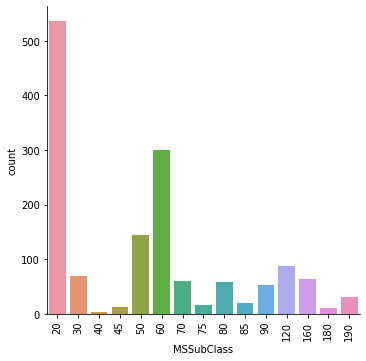

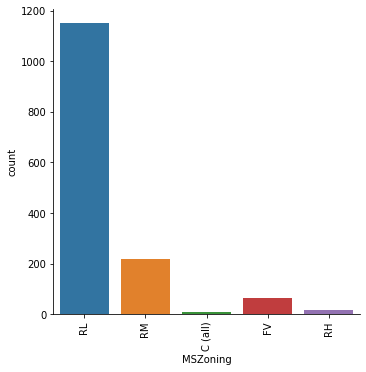

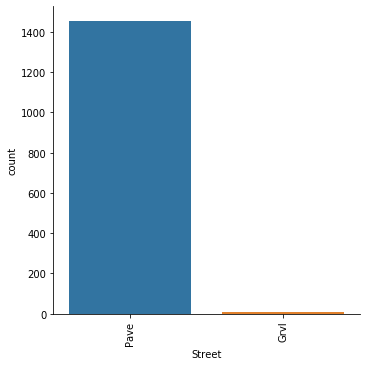

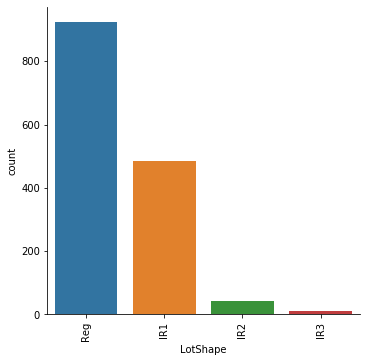

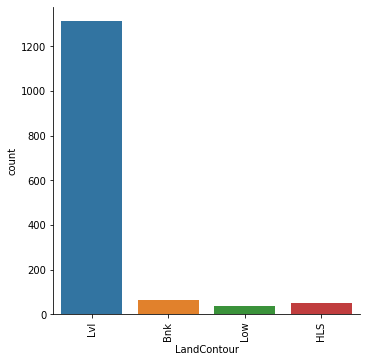

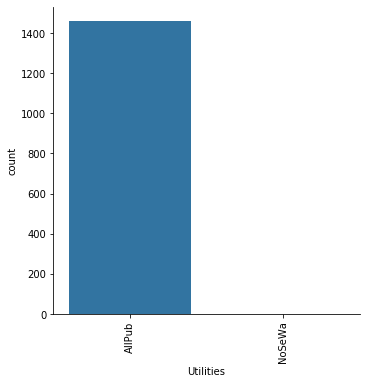

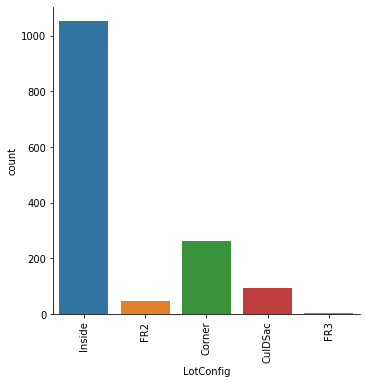

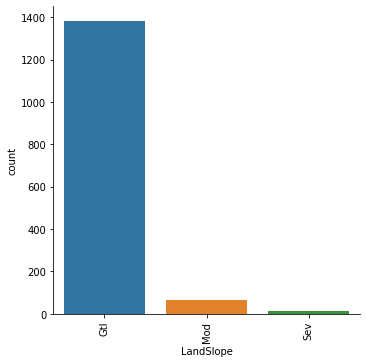

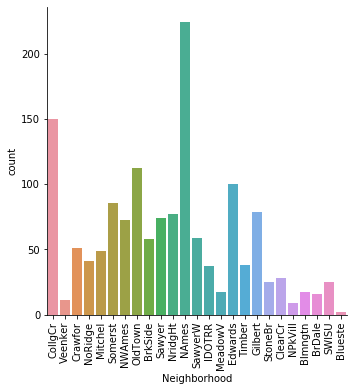

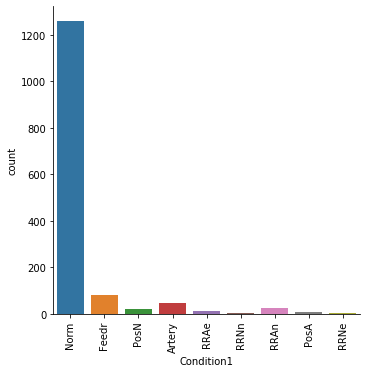

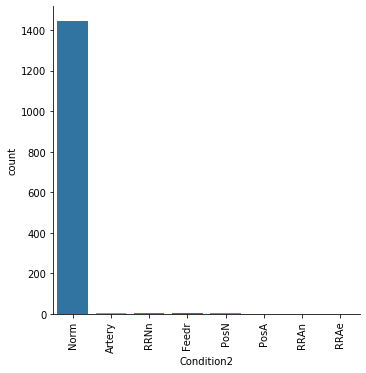

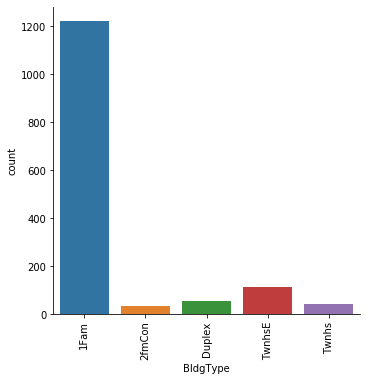

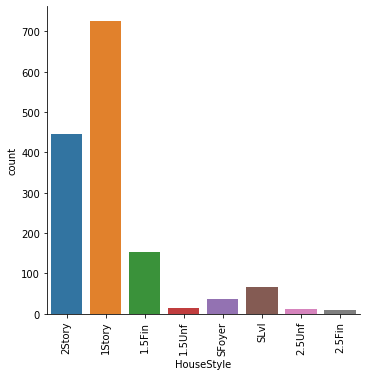

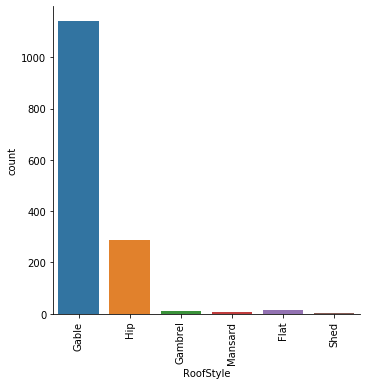

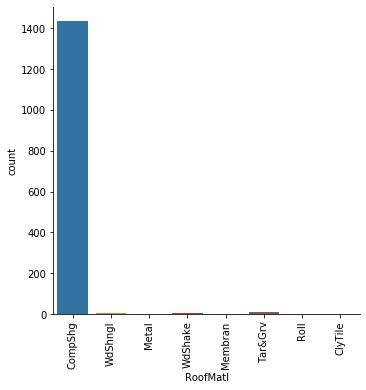

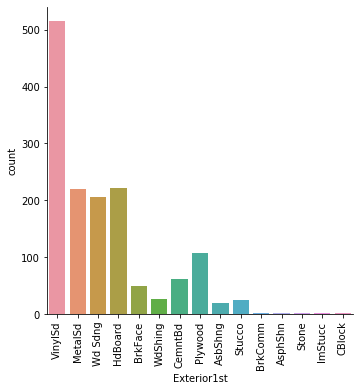

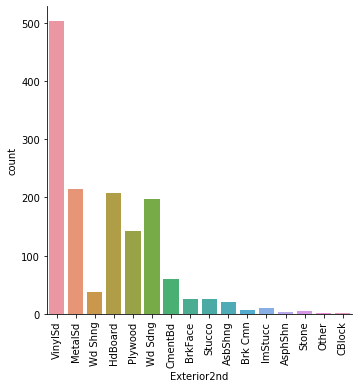

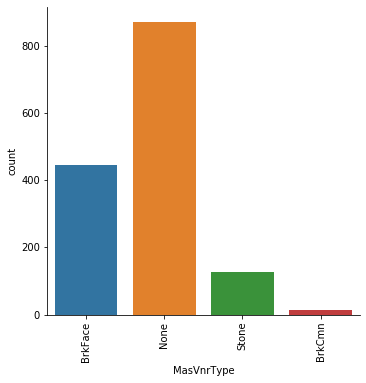

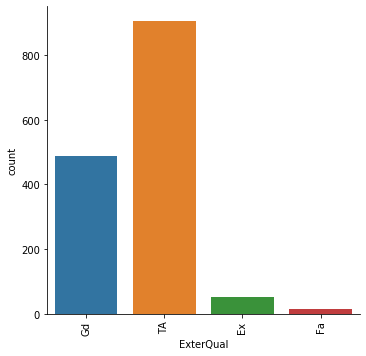

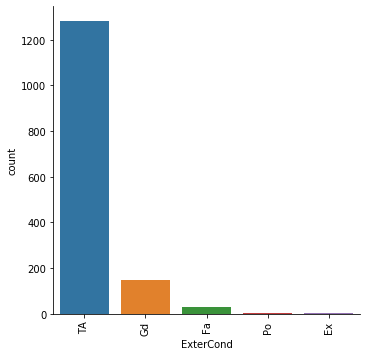

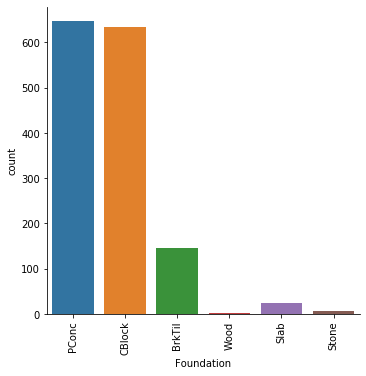

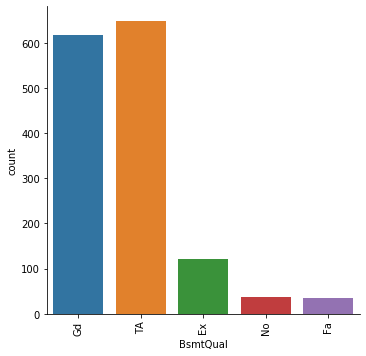

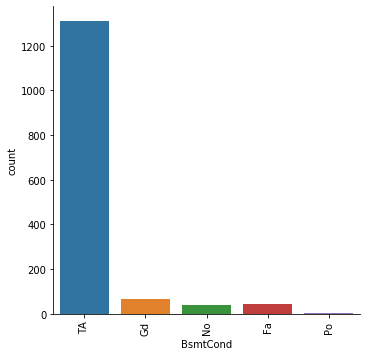

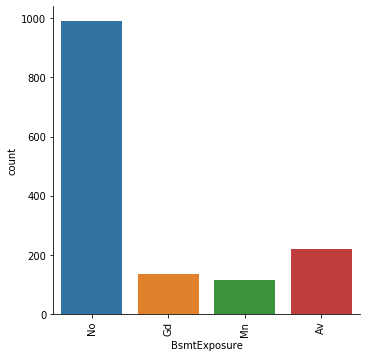

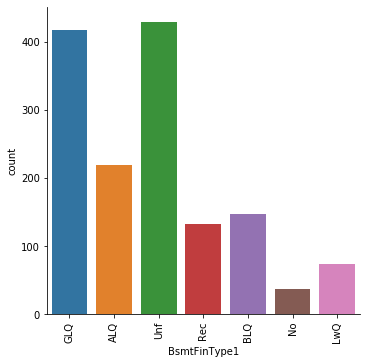

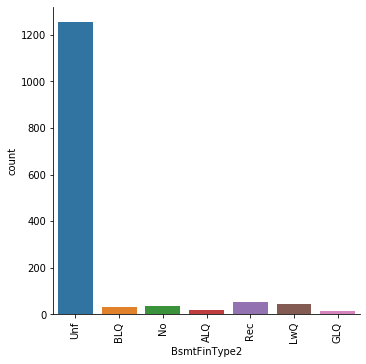

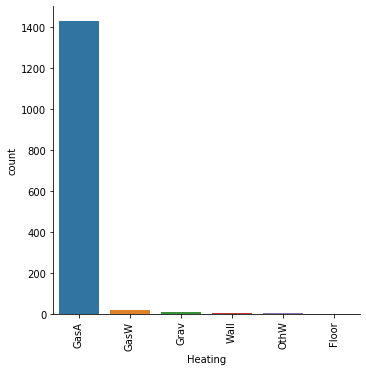

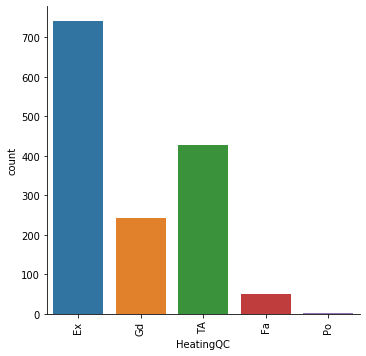

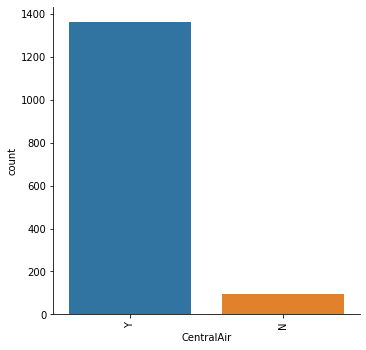

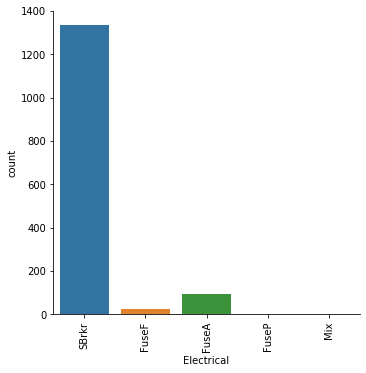

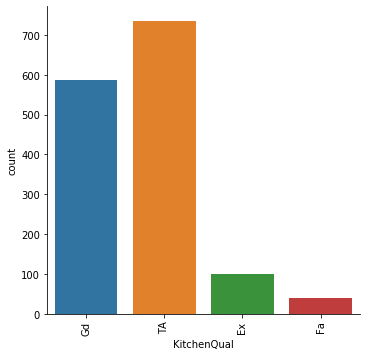

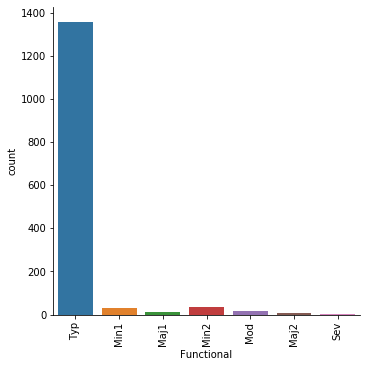

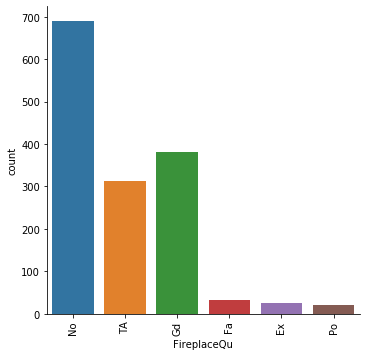

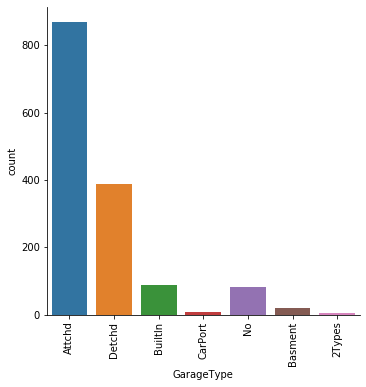

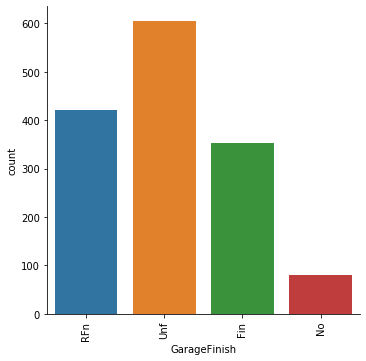

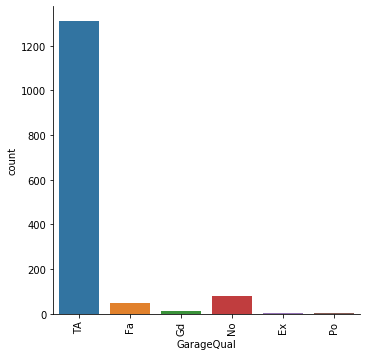

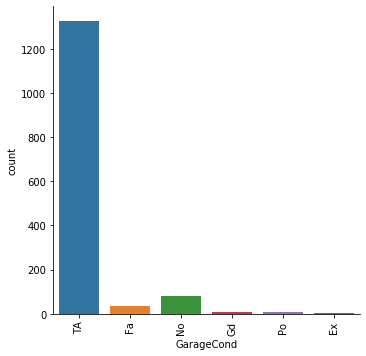

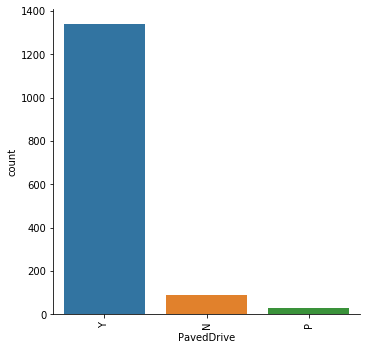

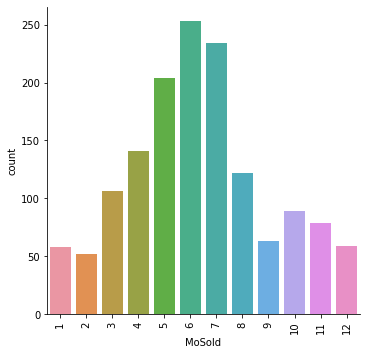

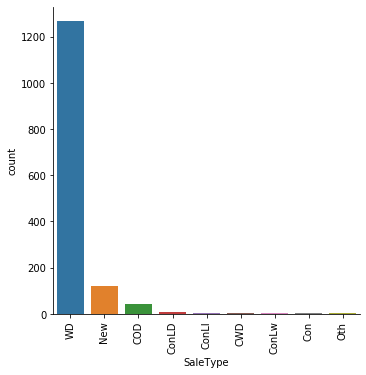

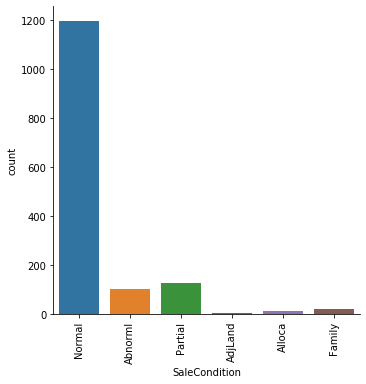

In [13]:
#Plotting the counts of unique values for each categorical feature in the training dataset.

for feature in cat_feats:
    fig = sns.catplot(x=feature, kind="count", data=train)
    fig.set_xticklabels(rotation=90)
    plt.show()

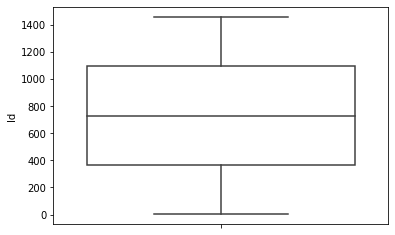

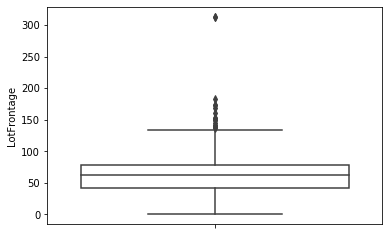

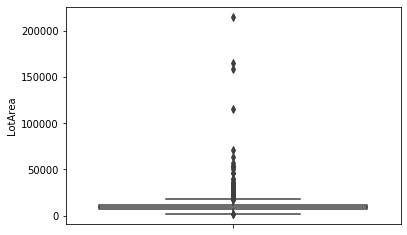

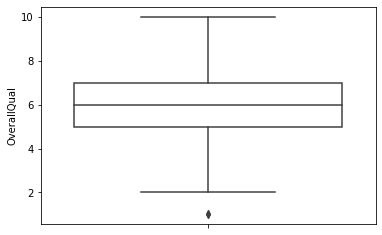

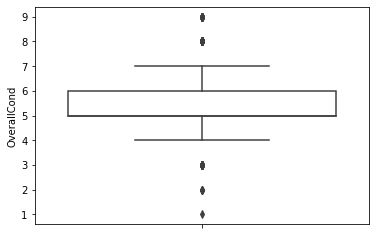

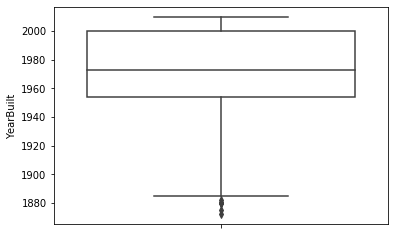

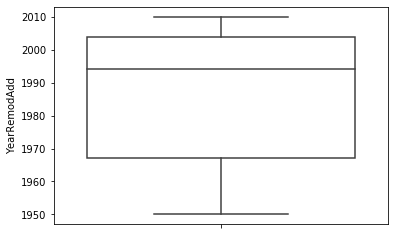

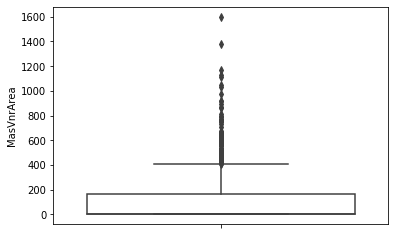

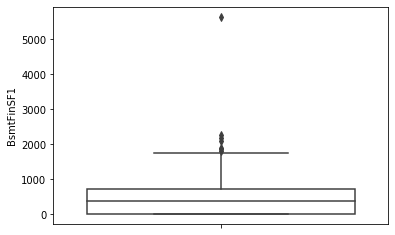

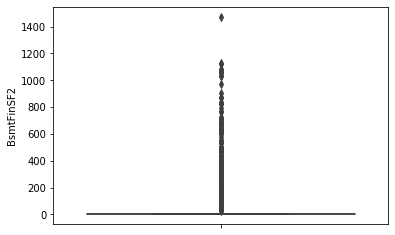

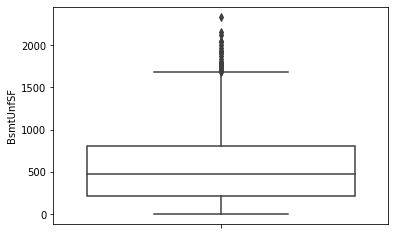

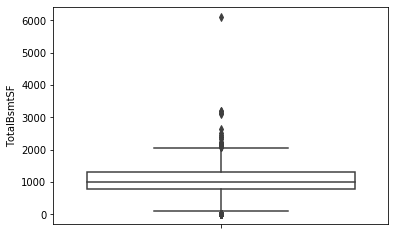

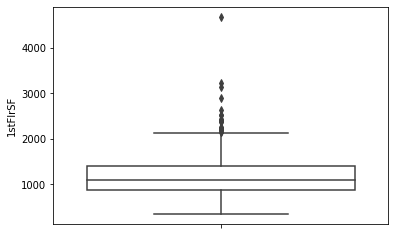

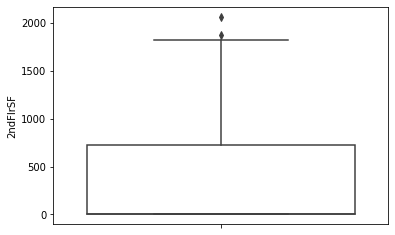

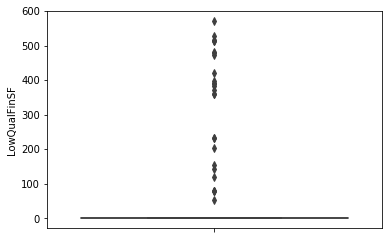

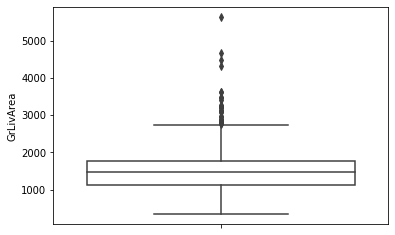

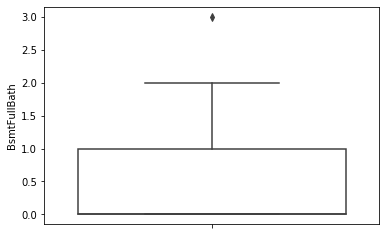

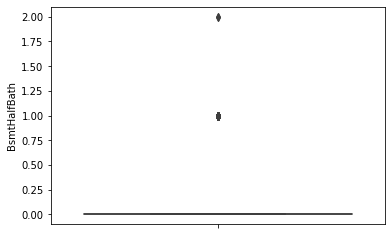

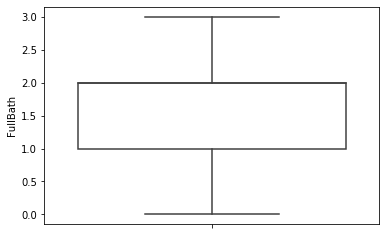

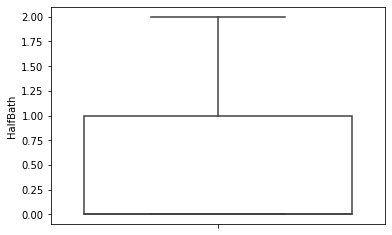

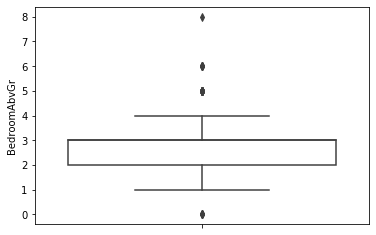

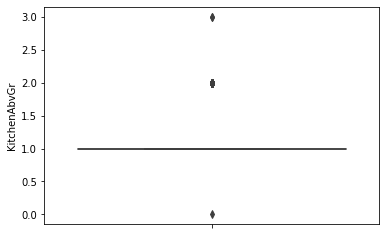

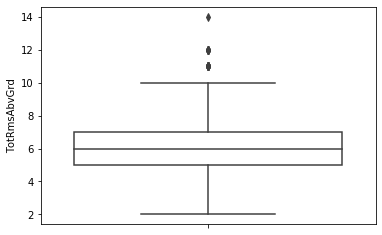

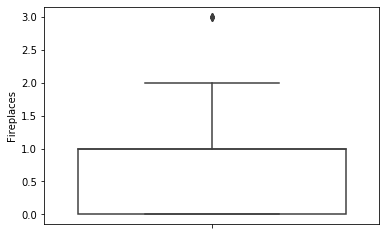

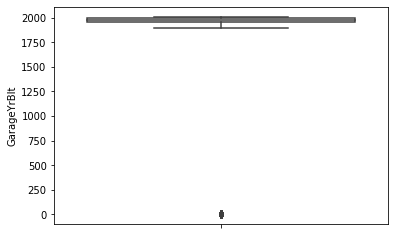

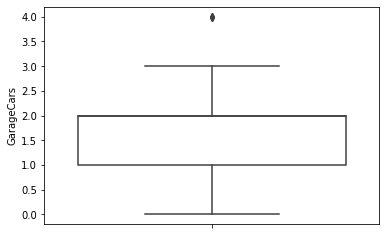

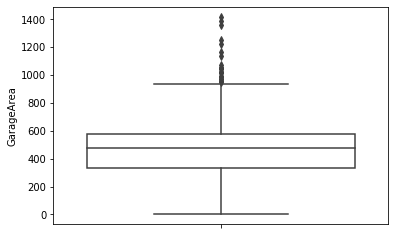

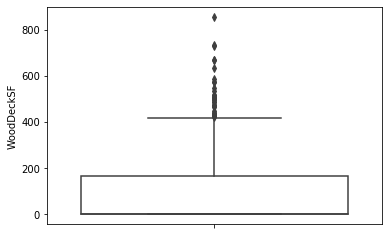

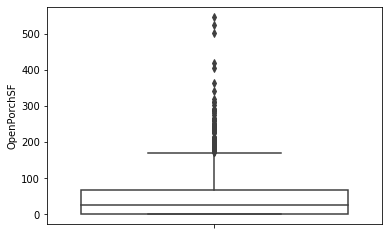

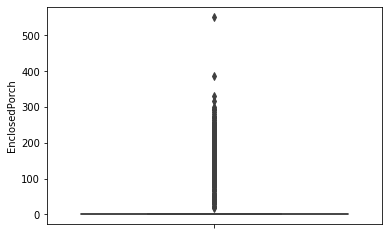

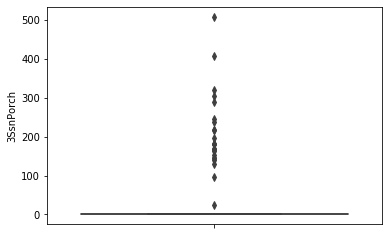

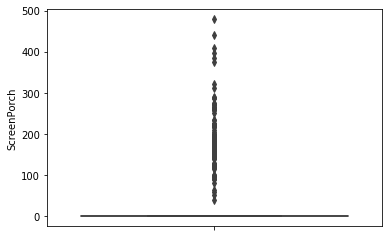

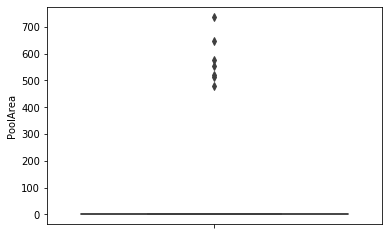

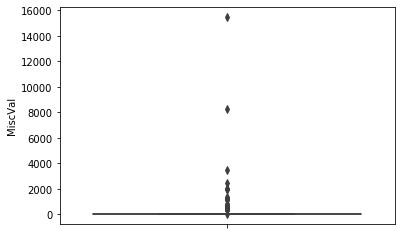

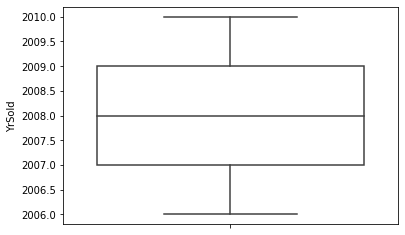

In [14]:
#Boxplots and pairplots with the target for numerical features:

for i in num_feats:
    sns.boxplot(y=i, data=train, boxprops={'facecolor': 'None'})
    plt.show()

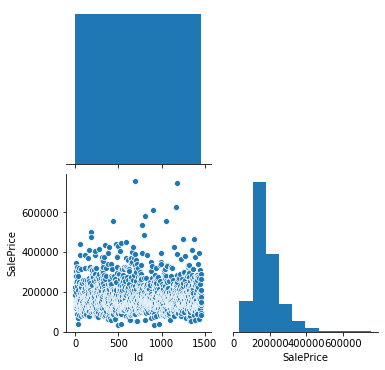

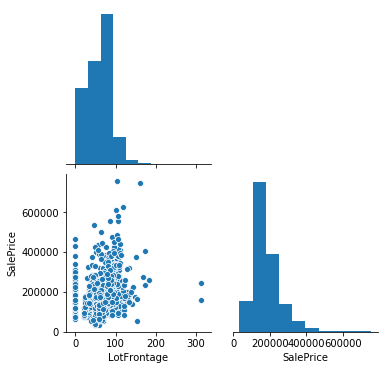

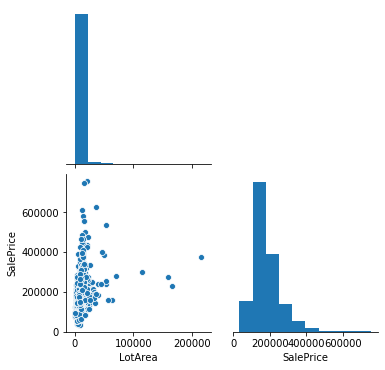

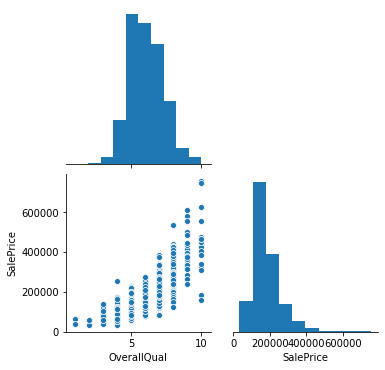

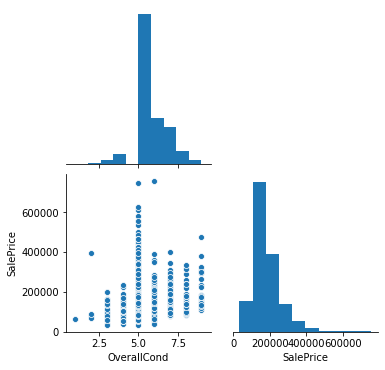

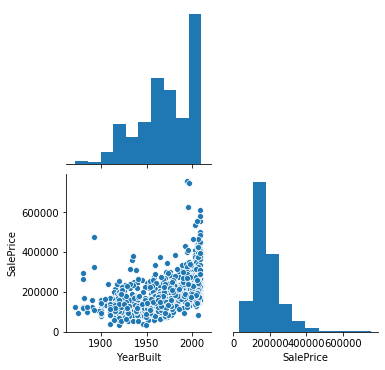

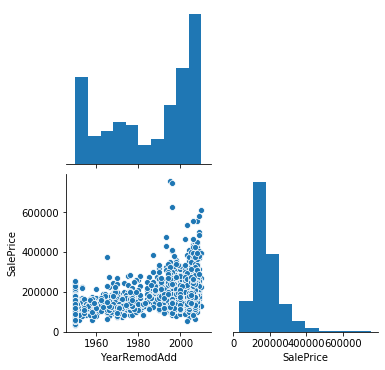

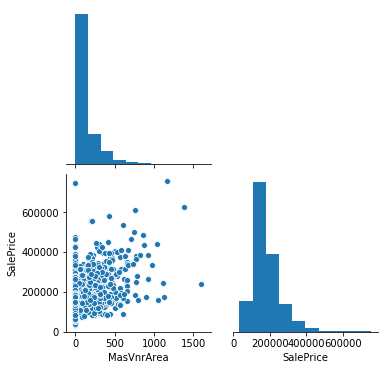

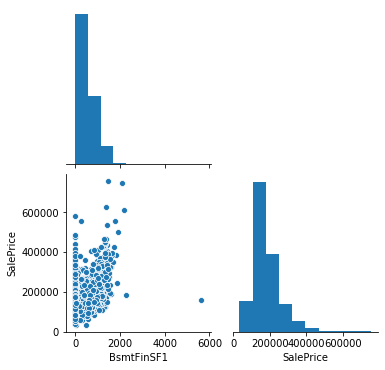

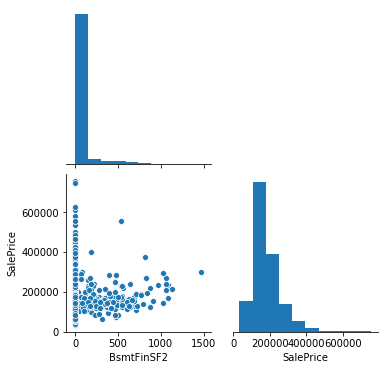

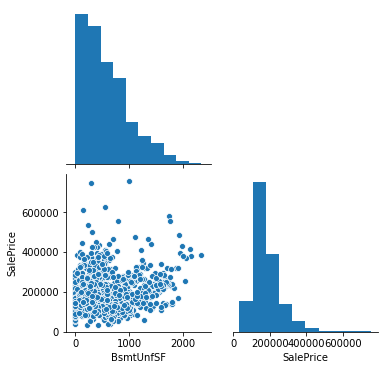

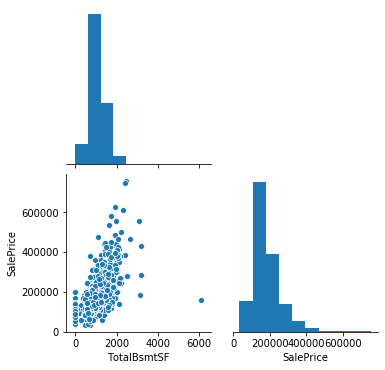

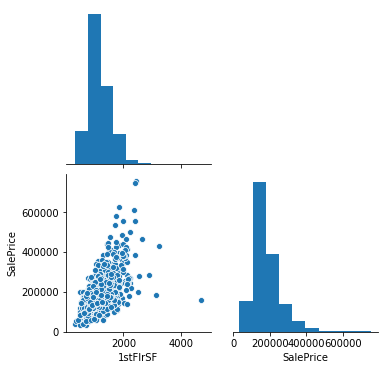

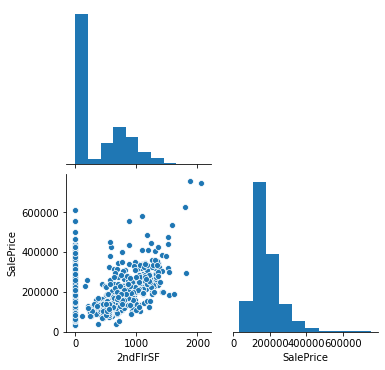

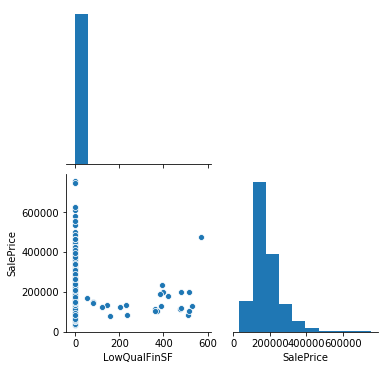

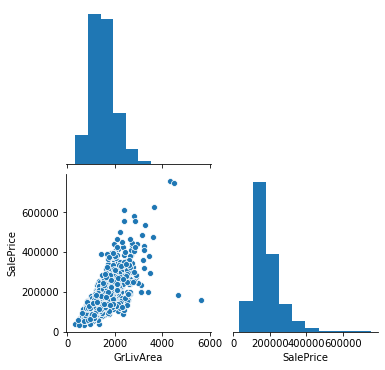

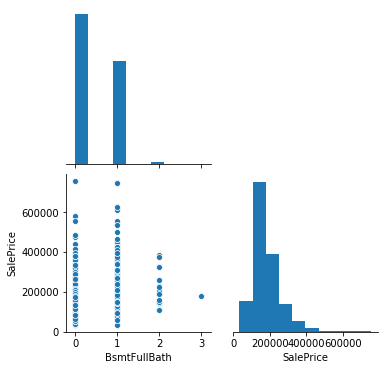

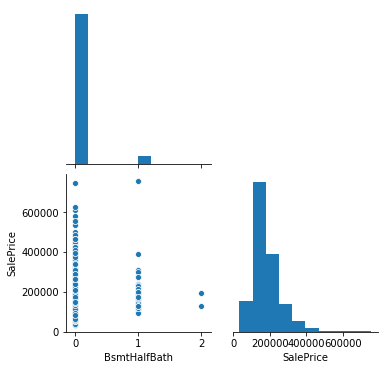

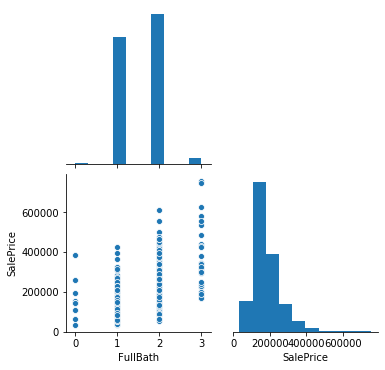

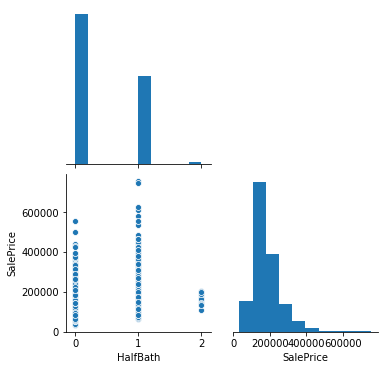

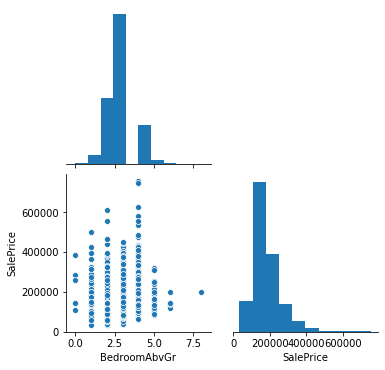

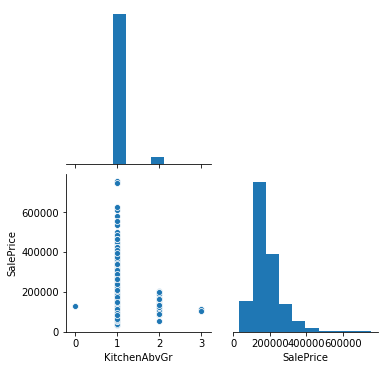

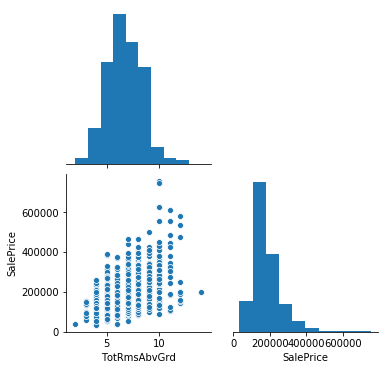

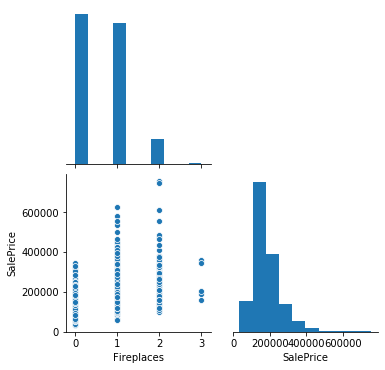

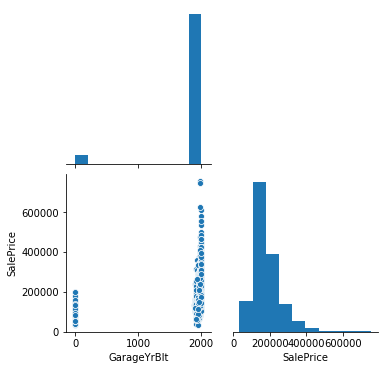

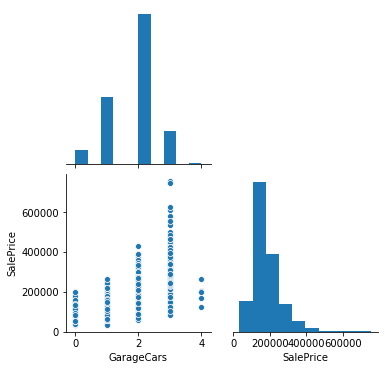

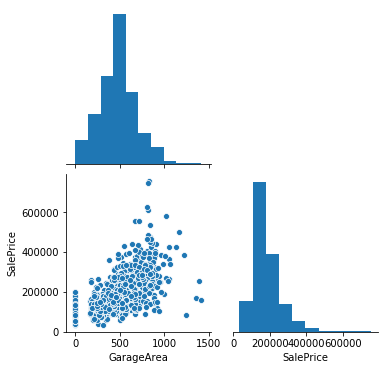

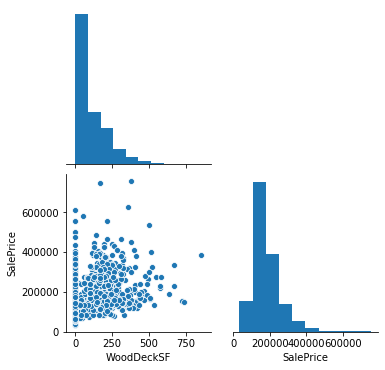

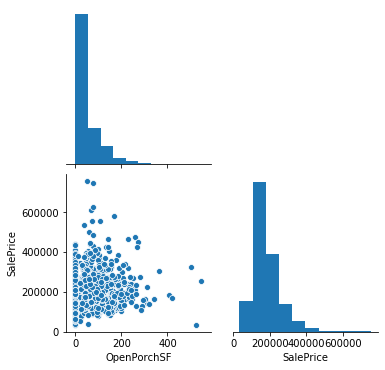

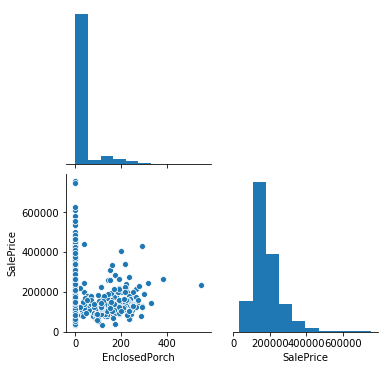

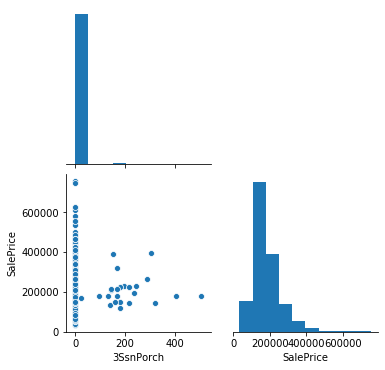

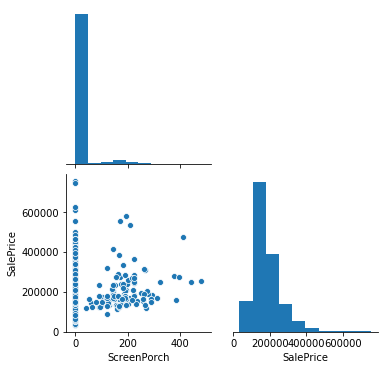

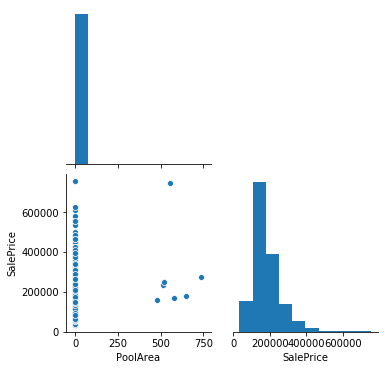

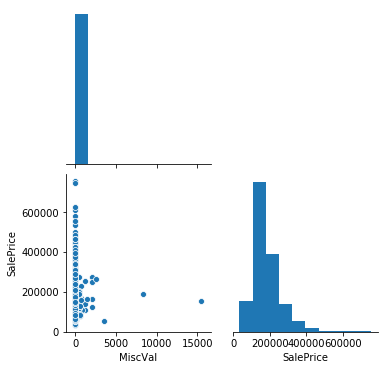

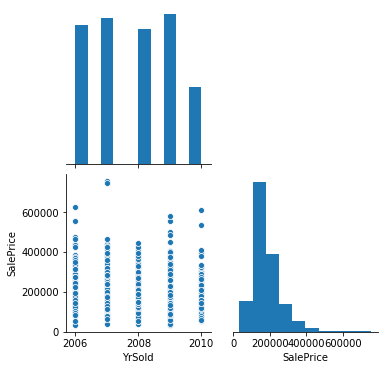

In [15]:
for i in num_feats:
    sns.pairplot(train, vars=[i, "SalePrice"],corner=True)
    plt.show()

In [16]:
feats = num_feats + cat_feats

In [17]:
corr = train[feats].corrwith(train["SalePrice"]).sort_values(ascending=False)
print(corr)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64


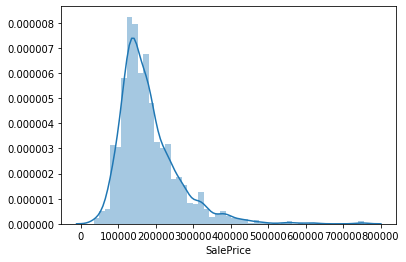

In [18]:
sns.distplot(train['SalePrice'])

In [19]:
# If log is turned to "True", target undergoes a logrithmic transformation. However, this did not lead to better results (I checked it with cross-validation further down below).

target = ["SalePrice"]
log = False
if log ==True:
    train["LogSalePrice"]=np.log10(train["SalePrice"])
    sns.distplot(train['LogSalePrice'])
    train=train.drop("SalePrice",axis=1)
    target.remove("SalePrice")
    target.append("LogSalePrice")

In [20]:
# One last check, in case I missed any null-values:

for i in cat_feats:
    if train[i].isnull().sum() > 0:
        print("train " + i + ": " +str(train[i].isnull().sum()))
    if test[i].isnull().sum() >0:
        print("test " + i + ": " +str(test[i].isnull().sum()))
for i in num_feats:
    if train[i].isnull().sum() > 0:
        print("train " + i + ": " +str(train[i].isnull().sum()))
    if test[i].isnull().sum() >0:
        print("test " + i + ": " +str(test[i].isnull().sum()))

In [21]:
# Droping potential outliers from few features most correlated with the target:

complete_data[0]=complete_data[0].drop(complete_data[0][(complete_data[0]['OverallQual']==10) & (complete_data[0]["SalePrice"]<200000)].index)
complete_data[0]=complete_data[0].drop(complete_data[0][(complete_data[0]['GrLivArea']>4000) & (complete_data[0]["SalePrice"]<200000)].index)
#complete_data[0]=complete_data[0].drop(complete_data[0][(complete_data[0]['GarageCars']>3)].index)
complete_data[0]=complete_data[0].drop(complete_data[0][(complete_data[0]["SalePrice"]>650000)].index)
complete_data[0]=complete_data[0].drop(complete_data[0][(complete_data[0]['TotalBsmtSF']>4000) & (complete_data[0]["SalePrice"]<200000)].index)
#complete_data[0]=complete_data[0].drop(complete_data[0][(complete_data[0]['1stFlrSF']>4000)].index)

In [22]:
#Quality and condition features lead to better resuls, if they become numerical features:

dt={"No": 0,"Po": 1,"Fa": 3,"TA" : 5 , "Gd" : 7 , "Ex" : 9}
for i in ["BsmtQual", "BsmtCond", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond"]:
    for j in complete_data:
        j[i]=j[i].apply(lambda x: dt[x] if x in dt else x)
        j[i]=j[i].astype('int64')

    cat_feats.remove(i)
    num_feats.append(i)

In [23]:
#Creating new features:

to_remove = set()
for i in complete_data:
    i["KitchenQuxNum"]=i["KitchenAbvGr"]*i["KitchenQual"]    
    i["KitchenQuxNumSquared"]=i["KitchenQuxNum"]*i["KitchenQuxNum"] # This and the feature below are introduced bec. of the sale prices of KitchenQuxnum. See the block below.
    i["SquaredKitchenPlus"]=i["KitchenQuxNum"]-0.1*i["KitchenQuxNumSquared"]
    i.drop("KitchenQuxNumSquared",axis="columns")
    num_feats.append("KitchenQuxNum")
    num_feats.append("SquaredKitchenPlus")
    
    i["AllBathrooms"]=i["BsmtFullBath"]+0.5*i["BsmtHalfBath"]+i["FullBath"]+0.5*i["HalfBath"]
    i.drop("BsmtFullBath",axis="columns") 
    i.drop("BsmtHalfBath",axis="columns")
    i.drop("FullBath",axis="columns")
    i.drop("HalfBath",axis="columns")
    num_feats.append("AllBathrooms")
    to_remove.add("BsmtFullBath")
    to_remove.add("BsmtHalfBath")
    to_remove.add("FullBath")
    to_remove.add("HalfBath")
    
    #i["TotalIndoorSF"]=i["TotalBsmtSF"]+i["1stFlrSF"]+i["2ndFlrSF"]
    i.drop("TotalBsmtSF",axis="columns") 
    i.drop("1stFlrSF",axis="columns")
    i.drop("2ndFlrSF",axis="columns")
    to_remove.add("TotalBsmtSF")
    to_remove.add("1stFlrSF")
    to_remove.add("2ndFlrSF")

    i["HasPool"]=i["PoolArea"].apply(lambda x: 0 if x==0 else 1)
    i.drop("PoolArea",axis="columns")
    cat_feats.append("HasPool")
    to_remove.add("PoolArea")

    i["PorchArea"]=i["WoodDeckSF"]+i["OpenPorchSF"]+i["EnclosedPorch"]+i["3SsnPorch"]+i["ScreenPorch"]
    i.drop("WoodDeckSF",axis="columns") 
    i.drop("OpenPorchSF",axis="columns")
    i.drop("EnclosedPorch",axis="columns")
    i.drop("3SsnPorch",axis="columns")
    i.drop("ScreenPorch",axis="columns")
    num_feats.append("PorchArea")
    to_remove.add("WoodDeckSF")
    to_remove.add("OpenPorchSF")
    to_remove.add("EnclosedPorch")
    to_remove.add("3SsnPorch")
    to_remove.add("ScreenPorch")
    
    i["AllRooms"]=i["TotRmsAbvGrd"]+i["FullBath"]+i["HalfBath"] 
    i.drop("TotRmsAbvGrd",axis="columns") 
    i.drop("FullBath",axis="columns")
    i.drop("HalfBath",axis="columns")
    to_remove.add("TotRmsAbvGrd")
    to_remove.add("FullBath")
    to_remove.add("HalfBath")
    
    i["BuildingAge"]=i["YrSold"]-i["YearBuilt"]
    i.drop("YrSold",axis="columns")
    to_remove.add("")
    
    i["FireplaceNew"]=i["Fireplaces"]*i["FireplaceQu"]
    
    i["YrBltAndRemod"]=i["YearBuilt"]+i["YearRemodAdd"]
    i.drop("YearBuilt",axis="columns")
    i.drop("YearRemodAdd",axis="columns")
    to_remove.add("YearBuilt")
    to_remove.add("YearRemodAdd")
    

In [24]:
to_remove.remove("")
for i in to_remove:
    num_feats.remove(i)

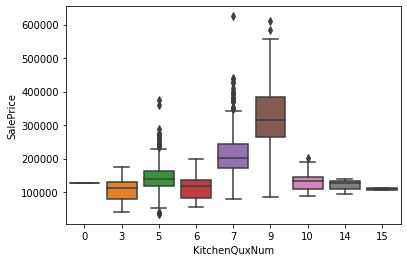

In [25]:
# As mentioned above one can see, that the average sale price seems to increases up to a certain point and then decreases.
# Adding the squared features can help in this kind of situation. The idea is taken from "Machine Learning for dummies" p. 229.

sns.boxplot(x="KitchenQuxNum", y="SalePrice", data = complete_data[0])

In [26]:
feats = num_feats + cat_feats

In [28]:
X_train = complete_data[0][feats]
X_test = complete_data[1][feats]

In [29]:
if log == True:
    y_train = complete_data[0]["LogSalePrice"]
else:
    y_train = complete_data[0]["SalePrice"]

In [30]:
# Next I used the make-pipline-function from Scikit-learn with a Standard Scaler and a One Hot Encoder to compare a Random Forrest model to an XGBoost model.
# Paramenters for the Random Forrest:

ests= range(10,200)
deps = range(10,200)
crit=["mae"]
mss=range(2,6)
msl=range(1,5)

params_rfr= dict(randomforestregressor__n_estimators=ests,
                 randomforestregressor__max_depth=deps,
                 randomforestregressor__criterion=crit,
                 randomforestregressor__min_samples_split=mss,
                 randomforestregressor__min_samples_leaf=msl)

In [31]:
# Parameters for the XGBoost:

et=[0.1,0.2,0.3,0.4]
dep = range(3,45)
sub=np.arange(0.7,1,0.1)
mcw=range(1,10)
est= range(2900,3000)
cbl= np.arange(0.9,1,0.1) 
cbt= np.arange(0.9,1,0.1) 
lr= np.arange(0.01,0.25,0.01)

params_xgbr=dict(xgbregressor__learning_rate=lr,
                 xgbregressor__colsample_bytree=cbl,
                 xgbregressor__colsample_bylevel=cbl,
                 xgbregressor__n_estimators=est,
                 xgbregressor__min_child_weight=mcw,
                 xgbregressor__eta=et,
                 xgbregressor__max_depth=dep,
                 xgbregressor__subsample=sub)

In [32]:
#The XGBoost turned out to make much better predictions.

col_trans_OHE_SS=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),cat_feats),
                                         (StandardScaler(with_mean=True,with_std=True),num_feats),
                                         remainder="passthrough")

model1=RandomForestRegressor()
model2=XGBRegressor()

#pipe3=make_pipeline(col_trans_OHE_SS,model1)
pipe4=make_pipeline(col_trans_OHE_SS,model2)

In [33]:
# In between I used the Cross Validatin Score to figure out whether newly created features improve the model.

#print(cross_val_score(pipe4,X_train,y_train,cv=40,scoring="neg_mean_absolute_error").mean())
#print(cross_val_score(pipe4,X_train,y_train,cv=80,scoring="neg_mean_absolute_error").mean())

In [34]:
# Randomized Search gives me the parameters I used for my final model:

#rand= RandomizedSearchCV(pipe4,params_xgbr,cv=80,verbose=1,n_iter = 8,scoring="neg_mean_absolute_error")
#rand.fit(X_train,y_train.values.ravel())
#print(rand.best_params_)
#if log== True:
#    print(np.power(10,rand.best_score_))
#else:
#    print(rand.best_score_)

In [35]:
# Parameters for the XGBRegressor are copied from the results of the Randomized Search above.

final_params = {"subsample":0.9,
                "n_estimators":1261,
                "min_child_weight":1,
                "max_depth":3,
                "learning_rate":0.06,
                "eta":0.3,
                "colsamle_by_tree":0.9,
                "colsample_bylevel":0.9,
                "verbosity":0}

final_model = XGBRegressor(**final_params)#-14659 
final_model.set_params()

final_pipe = make_pipeline(col_trans_OHE_SS,final_model)
final_pipe.fit(X_train,y_train)
preds=final_pipe.predict(X_test)

In [36]:
if log == True:
    preds = np.power(10,preds)

In [37]:
output = pd.DataFrame({'Id': test.Id, 'SalePrice': preds})
output.to_csv('house_prices_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [38]:
print(output.head())

     Id      SalePrice
0  1461  124609.398438
1  1462  166590.218750
2  1463  181462.031250
3  1464  196469.078125
4  1465  184891.593750
